# Test training

In [36]:
import pandas as pd
import numpy as np
from Bio import SeqIO
import torch
from crossevopred.src.model.dummy_model import DummyModel
from crossevopred.src.model.trainer import Trainer
from crossevopred.utils.data_processing_utils import *
from crossevopred.src.data.dataset import ExpressionDataset
from crossevopred.src.data.encoder import *
from crossevopred.utils.plots import *
import yaml
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pickle
from matplotlib.ticker import FuncFormatter
from torch.utils.data import DataLoader, ConcatDataset
import os
from crossevopred.src.model.CNNBaseline import CNNBaseline


warnings.filterwarnings('ignore')
sns.set_theme(style="ticks")
plt.rcParams['figure.figsize'] = [2, 2]

%load_ext autoreload
%autoreload 2


# Load training dataset
training_dataset = "/home/luisasantus/Desktop/crg_cluster/projects/CrossEvoPred/out/data/dataset/objects/Homo_sapiens/ATAC-seq/ENCFF062JUV/validation/chr1_validation_subsampled_no_blacklist-sequences-and-labels_00.pth"
trainining_datatset_loader = torch.load(training_dataset)
trainining_datatset_loader = DataLoader(trainining_datatset_loader, batch_size=32, shuffle=True)

model = CNNBaseline()
model.initialize_weights("xavier_uniform_")
trainer = Trainer(model = model, 
                  training_loader = trainining_datatset_loader,
                  validation_loader = None,
                  test_loader = None,
                  save_training_infos = True,
                  verbose = True)

config = "/home/luisasantus/Desktop/crg_cluster/projects/CrossEvoPred/bin/crossevopred/config/test_config.yaml"
trainer.train(config)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
 -  Epoch 1/2
torch.Size([32, 24, 8])


RuntimeError: running_mean should contain 256 elements not 8

TypeError: super(type, obj): obj must be an instance or subtype of type

 -  Epoch 1/2


AttributeError: 'CNNBaseline' object has no attribute 'dense1'

# Plots 
sns.set_palette("colorblind")
plot_loss_vs_epoch(trainer.training_infos, "Simulated data", "Loss vs epoch")

<Axes: title={'center': 'Loss vs epoch'}, xlabel='epoch', ylabel='loss'>

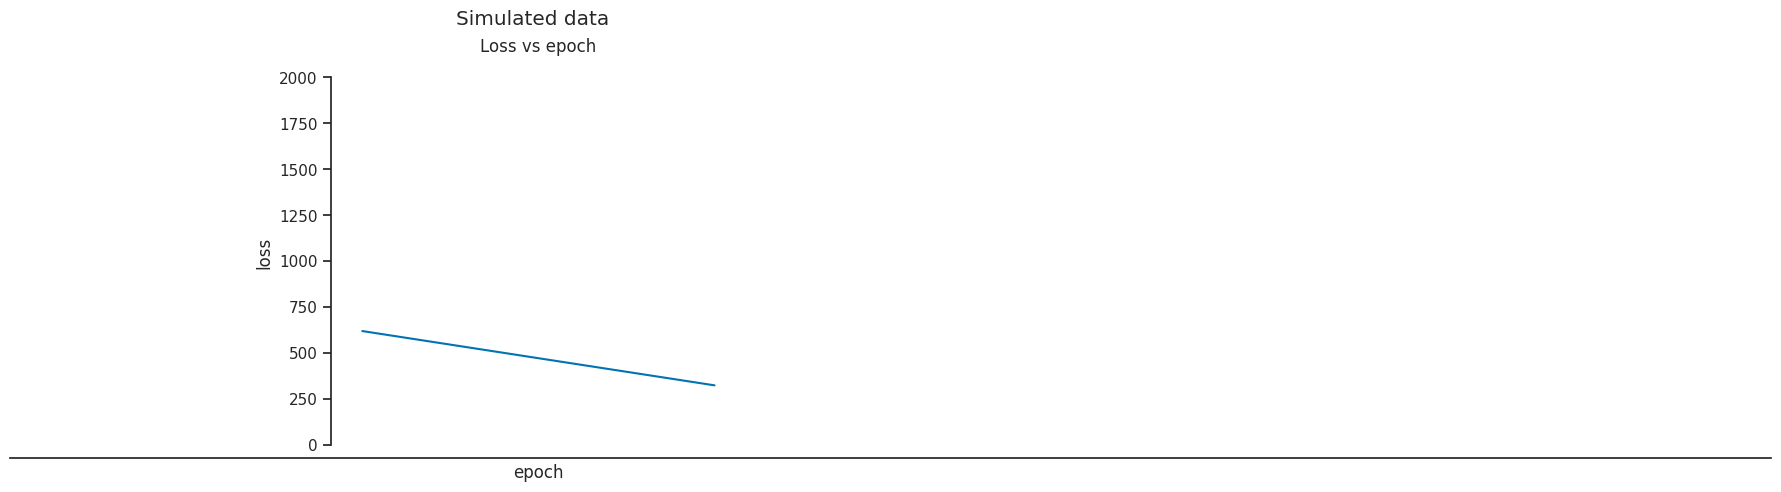

In [16]:
# Plots 
sns.set_palette("colorblind")
plot_loss_vs_epoch(trainer.training_infos, "Simulated data", "Loss vs epoch")